In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_NE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,NaN,72.0,NaN,0.0,33.6,0.627,NaN
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,NaN
2,NaN,NaN,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,NaN,66.0,23.0,94.0,28.1,0.167,NaN
4,0.0,137.0,40.0,35.0,168.0,NaN,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,NaN,76.0,NaN,180.0,32.9,0.171,NaN
764,2.0,122.0,70.0,27.0,0.0,NaN,0.340,NaN
765,5.0,121.0,72.0,23.0,NaN,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	152
float64		column 2	266
float64		column 3	114
float64		column 4	152
float64		column 5	76
float64		column 6	190
float64		column 7	38
float64		column 8	228


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,616.000000,502.000000,654.000000,616.000000,692.000000,578.000000,730.000000,540.000000
mean,3.793831,120.091633,69.830275,20.462662,78.192197,32.314014,0.473449,33.016667
std,3.225613,28.061374,17.507564,15.033142,114.780729,7.656682,0.333410,11.287674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,103.000000,64.000000,0.000000,0.000000,27.800000,0.245000,24.000000
50%,3.000000,118.500000,72.000000,23.000000,34.000000,32.300000,0.377000,29.000000
75%,6.000000,134.000000,80.000000,32.000000,120.000000,36.375000,0.625500,39.000000
max,15.000000,198.000000,122.000000,60.000000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

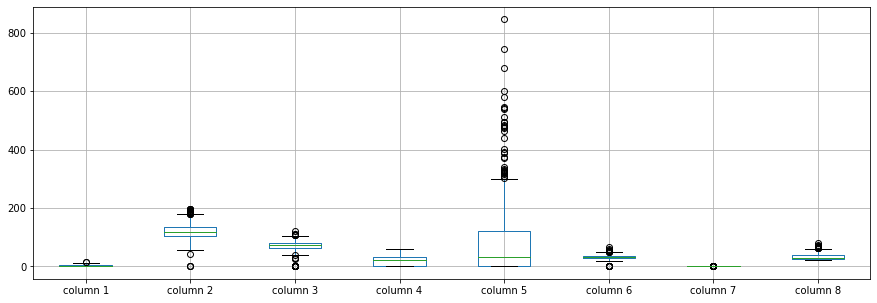

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.793831
column 2    120.091633
column 3     69.830275
column 4     20.462662
column 5     78.192197
column 6     32.314014
column 7      0.473449
column 8     33.016667
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.031458,0.143262,-0.033367,-0.078122,-0.013115,-0.070017,0.485174
column 2,0.031458,1.000000,0.092351,-0.002710,0.329925,0.167263,0.103380,0.207918
column 3,0.143262,0.092351,1.000000,0.179390,0.079535,0.182414,0.039507,0.213095
column 4,-0.033367,-0.002710,0.179390,1.000000,0.435414,0.306727,0.192344,-0.068534
column 5,-0.078122,0.329925,0.079535,0.435414,1.000000,0.171053,0.196613,0.037398
column 6,-0.013115,0.167263,0.182414,0.306727,0.171053,1.000000,0.106489,0.039574
column 7,-0.070017,0.103380,0.039507,0.192344,0.196613,0.106489,1.000000,0.033485
column 8,0.485174,0.207918,0.213095,-0.068534,0.037398,0.039574,0.033485,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+23,8+23+23,8+23+23+23,8+23+23+23+23,8+23+23+23+23+23,8+23+23+23+23+23+23,8+23+23+23+23+23,8+23+23+23+23,8+23+23+23,8+23+23,8+23,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 334.77831904093426
Epoch: 1 , loss: 332.739538192749
Epoch: 2 , loss: 332.36016209920246
Epoch: 3 , loss: 332.54134305318195
Epoch: 4 , loss: 330.9968779881795
Epoch: 5 , loss: 329.84816964467365
Epoch: 6 , loss: 330.06175168355304
Epoch: 7 , loss: 327.02607409159344
Epoch: 8 , loss: 327.77676486968994
Epoch: 9 , loss: 324.85565789540607
Epoch: 10 , loss: 323.9957272211711
Epoch: 11 , loss: 316.15187644958496
Epoch: 12 , loss: 314.25661500295
Epoch: 13 , loss: 310.3001006444295
Epoch: 14 , loss: 302.2032979329427
Epoch: 15 , loss: 299.7674077351888
Epoch: 16 , loss: 290.55330753326416
Epoch: 17 , loss: 294.2543198267619
Epoch: 18 , loss: 284.80929438273114
Epoch: 19 , loss: 282.8337637583415
Epoch: 20 , loss: 273.988868077596
Epoch: 21 , loss: 275.1669292449951
Epoch: 22 , loss: 268.94947083791095
Epoch: 23 , loss: 260.1350844701131
Epoch: 24 , loss: 261.6916758219401
Epoch: 25 , loss: 261.4791994094848

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000000
column 2    99.000000
column 3    84.000000
column 4     0.000000
column 5     0.000000
column 6    35.400000
column 7     0.388000
column 8    25.308704
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,-113.624294,0.0,-26.739156,0.000000,0.000000,0.0,-37.618982
1,0.000000,0.000000,0.0,0.000000,0.000000,-8.342767,0.0,-12.419428
2,-5.343017,-120.769310,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,21.342255,0.0,0.000000,0.000000,0.000000,0.0,18.540043
4,0.000000,0.000000,0.0,0.000000,0.000000,-13.687332,0.0,0.000000
...,...,...,...,...,...,...,...,...
763,0.000000,-100.504314,0.0,-47.585706,0.000000,0.000000,0.0,-62.531595
764,0.000000,0.000000,0.0,0.000000,0.000000,-20.699914,0.0,-10.674429
765,0.000000,0.000000,0.0,0.000000,-8.531731,0.000000,0.0,0.000000
766,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1976.558975872219, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.34216790201102854

In [18]:
new_df.iloc[66,:]

column 1      0.000000
column 2    109.000000
column 3     88.000000
column 4     30.000000
column 5     12.772213
column 6     32.500000
column 7      0.855000
column 8     38.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.000000,34.375706,72.0,8.260844,0.000000,33.600000,0.627,12.381018
1,1.000000,85.000000,66.0,29.000000,0.000000,18.257233,0.351,18.580572
2,2.656983,62.230690,64.0,0.000000,0.000000,23.300000,0.672,32.000000
3,1.000000,110.342255,66.0,23.000000,94.000000,28.100000,0.167,39.540043
4,0.000000,137.000000,40.0,35.000000,168.000000,29.412668,2.288,33.000000
...,...,...,...,...,...,...,...,...
763,10.000000,0.495686,76.0,0.414294,180.000000,32.900000,0.171,0.468405
764,2.000000,122.000000,70.0,27.000000,0.000000,16.100086,0.340,16.325571
765,5.000000,121.000000,72.0,23.000000,103.468269,26.200000,0.245,30.000000
766,1.000000,126.000000,60.0,0.000000,0.000000,30.100000,0.349,47.000000


In [20]:
imputations[-1].to_excel("PID_NE_20.xlsx", index=False, header=False)